In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# import scikit-learn dataset library
from sklearn import datasets

# import train_test_split function
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/Misagh_paper/Amylonewedited_8Aug22.xlsx")
print(df)

     sex        age       BSA  RA_EDVi  RA_ESVi  RV_EDVi  RV_ESVi  HR  \
0      0  76.000000  1.820000       57       34     97.0     61.0  61   
1      0  74.000000  1.980000       46       36    113.0     63.0  76   
2      0  90.000000  1.840000       53       37     82.0     52.0  85   
3      1  42.000000  1.670000       46       38     96.0     53.0  78   
4      0  63.000000  2.270000       74       62    106.0     52.0  78   
..   ...        ...       ...      ...      ...      ...      ...  ..   
102    1  62.893151  1.569779       29       21     55.5     17.7  74   
103    1  54.230137  1.738297       51       23     73.8     27.0  55   
104    0  66.230137  1.995130       58       36    103.6     44.1  63   
105    0  52.545205  1.926734       39       25     66.5     29.3  76   
106    0  53.358904  2.001206       59       22     78.4     35.2  53   

         LV_EF  RV_EF  ...  RV_GCSR_SAX_sys  RV_GRSR_SAX_dia  RV_GCSR_SAX_dia  \
0    62.000000     64  ...            -0.6

In [3]:
df.head()

,sex,age,BSA,RA_EDVi,RA_ESVi,RV_EDVi,RV_ESVi,HR,LV_EF,RV_EF,...,RV_GCSR_SAX_sys,RV_GRSR_SAX_dia,RV_GCSR_SAX_dia,RV_GRS_4Ch,RV_GLS_4Ch,RV_GRSR_4Ch_sys,RV_GLSR_4Ch_sys,RV_GRSR_4Ch_dia,RV_GLSR_4Ch_dia,group
0,0,76.0,1.82,57,34,97.0,61.0,61,62.0,64,...,-0.67,-1.29,0.63,49.00,-23.00,2.70,-1.50,-2.50,1.40,0
1,0,74.0,1.98,46,36,113.0,63.0,76,40.0,38,...,-0.44,-0.44,0.34,25.80,-16.30,1.66,-1.00,-1.94,1.08,0
2,0,90.0,1.84,53,37,82.0,52.0,85,53.0,35,...,-0.44,-0.44,0.34,25.85,-16.35,1.66,-1.03,-1.94,1.08,0
3,1,42.0,1.67,46,38,96.0,53.0,78,72.0,44,...,-0.57,-0.89,0.67,18.96,-12.97,1.48,-1.03,-1.50,0.88,0
4,0,63.0,2.27,74,62,106.0,52.0,78,71.0,51,...,0.72,-0.96,0.63,47.00,-17.70,5.33,-2.55,-2.90,1.70,0


In [4]:
correlation_matrix = df.corr()
correlation_matrix["BSA"]

sex               -0.638035
age               -0.103531
BSA                1.000000
RA_EDVi            0.038168
RA_ESVi           -0.019393
RV_EDVi            0.263546
RV_ESVi            0.164000
HR                -0.051499
LV_EF             -0.185737
RV_EF             -0.125978
RA_S_Res          -0.161446
RA_S_Con          -0.072056
RA_S_Boo          -0.228642
RA_SR_Res         -0.073613
RA_SR_Con          0.176918
RA_SR_Boo          0.070539
LA_S_Res_4Ch      -0.065804
LA_S_Con_4Ch      -0.039144
LA_S_Boo_4Ch      -0.100032
LA_S_Res_2Ch      -0.189082
LA_S_Con_2Ch      -0.186961
LA_S_Boo_2Ch      -0.164951
LA_SR_Res_4Ch     -0.147663
LA_SR_Con_4Ch      0.085973
LA_SR_Boo_4Ch      0.093645
LA_SR_Res_2Ch     -0.128094
LA_SR_Con_2Ch      0.203873
LA_SR_Boo_2Ch      0.220169
RV_GRS_SAX        -0.056946
RV_GCS_SAX         0.030048
RV_GRSR_SAX_sys    0.018269
RV_GCSR_SAX_sys   -0.026265
RV_GRSR_SAX_dia    0.069234
RV_GCSR_SAX_dia   -0.138397
RV_GRS_4Ch        -0.003183
RV_GLS_4Ch        -0

In [5]:
df_corr = df.corr().style.background_gradient(cmap='coolwarm')
df_corr

,sex,age,BSA,RA_EDVi,RA_ESVi,RV_EDVi,RV_ESVi,HR,LV_EF,RV_EF,RA_S_Res,RA_S_Con,RA_S_Boo,RA_SR_Res,RA_SR_Con,RA_SR_Boo,LA_S_Res_4Ch,LA_S_Con_4Ch,LA_S_Boo_4Ch,LA_S_Res_2Ch,LA_S_Con_2Ch,LA_S_Boo_2Ch,LA_SR_Res_4Ch,LA_SR_Con_4Ch,LA_SR_Boo_4Ch,LA_SR_Res_2Ch,LA_SR_Con_2Ch,LA_SR_Boo_2Ch,RV_GRS_SAX,RV_GCS_SAX,RV_GRSR_SAX_sys,RV_GCSR_SAX_sys,RV_GRSR_SAX_dia,RV_GCSR_SAX_dia,RV_GRS_4Ch,RV_GLS_4Ch,RV_GRSR_4Ch_sys,RV_GLSR_4Ch_sys,RV_GRSR_4Ch_dia,RV_GLSR_4Ch_dia,group
sex,1.000000,-0.185678,-0.638035,-0.205543,-0.213739,-0.450734,-0.405895,0.074167,0.350631,0.309868,0.321827,0.280842,0.274235,0.226086,-0.325988,-0.201737,0.092597,0.043967,0.167732,0.219322,0.175091,0.238364,0.140539,-0.046526,0.013514,0.095676,-0.144527,-0.243982,0.183753,-0.213050,0.061570,0.001908,-0.152314,0.261356,0.207428,-0.198505,0.164718,0.023461,-0.253398,0.166143,0.203931
age,-0.185678,1.000000,-0.103531,0.330059,0.395580,0.166005,0.530137,0.144196,-0.403385,-0.619615,-0.603217,-0.522643,-0.518981,-0.430151,0.604435,0.474382,-0.452846,-0.387732,-0.442116,-0.590085,-0.544017,-0.559196,-0.388403,0.358152,0.185628,-0.543683,0.540881,0.489477,-0.469150,0.404446,-0.498850,0.226352,0.445725,-0.443018,-0.298030,0.137592,-0.142208,-0.145522,0.276394,-0.003858,-0.742336
BSA,-0.638035,-0.103531,1.000000,0.038168,-0.019393,0.263546,0.164000,-0.051499,-0.185737,-0.125978,-0.161446,-0.072056,-0.228642,-0.073613,0.176918,0.070539,-0.065804,-0.039144,-0.100032,-0.189082,-0.186961,-0.164951,-0.147663,0.085973,0.093645,-0.128094,0.203873,0.220169,-0.056946,0.030048,0.018269,-0.026265,0.069234,-0.138397,-0.003183,-0.016433,-0.032301,0.083857,0.102801,-0.119122,-0.052158
RA_EDVi,-0.205543,0.330059,0.038168,1.000000,0.855184,0.509655,0.420005,-0.057284,-0.102966,-0.216599,-0.396886,-0.346056,-0.338573,-0.308185,0.344527,0.424114,-0.185240,-0.129461,-0.249771,-0.241781,-0.193400,-0.262345,-0.197610,0.158591,0.137523,-0.185540,0.203812,0.281780,-0.261884,0.222170,-0.219530,0.233366,0.164626,-0.143776,-0.156110,0.054806,-0.081408,-0.140788,0.125441,-0.119786,-0.330072
RA_ESVi,-0.213739,0.395580,-0.019393,0.855184,1.000000,0.544615,0.519377,0.027635,-0.258700,-0.392758,-0.507658,-0.469984,-0.396891,-0.457423,0.395448,0.535906,-0.262392,-0.188757,-0.319836,-0.301064,-0.239174,-0.328524,-0.230454,0.191679,0.186089,-0.261691,0.240552,0.310499,-0.295826,0.253308,-0.266746,0.291466,0.178188,-0.158812,-0.276816,0.168287,-0.179868,-0.081407,0.191042,-0.185720,-0.411307
RV_EDVi,-0.450734,0.166005,0.263546,0.509655,0.544615,1.000000,0.769095,-0.156216,-0.354609,-0.409249,-0.354690,-0.330108,-0.274998,-0.275351,0.303309,0.348027,-0.108634,-0.023797,-0.213697,-0.192740,-0.112847,-0.255662,-0.170215,0.079905,0.111272,-0.126043,0.143610,0.211793,-0.413357,0.425724,-0.371398,0.359256,0.327657,-0.374133,-0.233532,0.259651,-0.188356,0.030823,0.194636,-0.240772,-0.303012
RV_ESVi,-0.405895,0.530137,0.164000,0.420005,0.519377,0.769095,1.000000,0.010550,-0.582484,-0.808142,-0.577205,-0.473468,-0.531846,-0.469087,0.505421,0.517750,-0.356919,-0.261892,-0.428811,-0.499969,-0.399668,-0.542781,-0.360332,0.268968,0.197859,-0.417454,0.413391,0.467102,-0.582589,0.554291,-0.570594,0.405866,0.507206,-0.550025,-0.388390,0.331587,-0.217231,-0.090525,0.288447,-0.208854,-0.632393
HR,0.074167,0.144196,-0.051499,-0.057284,0.027635,-0.156216,0.010550,1.000000,-0.255571,-0.268175,-0.196754,-0.205847,-0.122472,-0.135387,0.110727,0.044951,-0.211461,-0.188506,-0.242101,-0.177980,-0.146239,-0.188757,-0.181590,0.113883,0.062616,-0.040341,0.039400,0.018517,-0.174748,0.103100,-0.049375,-0.033009,-0.035229,0.176393,-0.138781,0.081035,0.001633,-0.254353,-0.089576,0.241732,-0.320873
LV_EF,0.350631,-0.403385,-0.185737,-0.102966,-0.258700,-0.354609,-0.582484,-0.255571,1.000000,0.708307,0.438374,0.358103,0.405889,0.452875,-0.353520,-0.397767,0.270662,0.220410,0.289412,0.356144,0.271513,0.401484,0.239916,-0.179549,-0.122976,0.288650,-0.266958,-0.302283,0.508624,-0.419988,0.481479,-0.289962,-0.381133,0.353143,0.357414,-0.243665,0.337659,0.04

In [6]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [7]:
df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
df_corr_norm

,sex,age,BSA,RA_EDVi,RA_ESVi,RV_EDVi,RV_ESVi,HR,LV_EF,RV_EF,RA_S_Res,RA_S_Con,RA_S_Boo,RA_SR_Res,RA_SR_Con,RA_SR_Boo,LA_S_Res_4Ch,LA_S_Con_4Ch,LA_S_Boo_4Ch,LA_S_Res_2Ch,LA_S_Con_2Ch,LA_S_Boo_2Ch,LA_SR_Res_4Ch,LA_SR_Con_4Ch,LA_SR_Boo_4Ch,LA_SR_Res_2Ch,LA_SR_Con_2Ch,LA_SR_Boo_2Ch,RV_GRS_SAX,RV_GCS_SAX,RV_GRSR_SAX_sys,RV_GCSR_SAX_sys,RV_GRSR_SAX_dia,RV_GCSR_SAX_dia,RV_GRS_4Ch,RV_GLS_4Ch,RV_GRSR_4Ch_sys,RV_GLSR_4Ch_sys,RV_GRSR_4Ch_dia,RV_GLSR_4Ch_dia,group
sex,1.000000,-0.185678,-0.638035,-0.205543,-0.213739,-0.450734,-0.405895,0.074167,0.350631,0.309868,0.321827,0.280842,0.274235,0.226086,-0.325988,-0.201737,0.092597,0.043967,0.167732,0.219322,0.175091,0.238364,0.140539,-0.046526,0.013514,0.095676,-0.144527,-0.243982,0.183753,-0.213050,0.061570,0.001908,-0.152314,0.261356,0.207428,-0.198505,0.164718,0.023461,-0.253398,0.166143,0.203931
age,-0.185678,1.000000,-0.103531,0.330059,0.395580,0.166005,0.530137,0.144196,-0.403385,-0.619615,-0.603217,-0.522643,-0.518981,-0.430151,0.604435,0.474382,-0.452846,-0.387732,-0.442116,-0.590085,-0.544017,-0.559196,-0.388403,0.358152,0.185628,-0.543683,0.540881,0.489477,-0.469150,0.404446,-0.498850,0.226352,0.445725,-0.443018,-0.298030,0.137592,-0.142208,-0.145522,0.276394,-0.003858,-0.742336
BSA,-0.638035,-0.103531,1.000000,0.038168,-0.019393,0.263546,0.164000,-0.051499,-0.185737,-0.125978,-0.161446,-0.072056,-0.228642,-0.073613,0.176918,0.070539,-0.065804,-0.039144,-0.100032,-0.189082,-0.186961,-0.164951,-0.147663,0.085973,0.093645,-0.128094,0.203873,0.220169,-0.056946,0.030048,0.018269,-0.026265,0.069234,-0.138397,-0.003183,-0.016433,-0.032301,0.083857,0.102801,-0.119122,-0.052158
RA_EDVi,-0.205543,0.330059,0.038168,1.000000,0.855184,0.509655,0.420005,-0.057284,-0.102966,-0.216599,-0.396886,-0.346056,-0.338573,-0.308185,0.344527,0.424114,-0.185240,-0.129461,-0.249771,-0.241781,-0.193400,-0.262345,-0.197610,0.158591,0.137523,-0.185540,0.203812,0.281780,-0.261884,0.222170,-0.219530,0.233366,0.164626,-0.143776,-0.156110,0.054806,-0.081408,-0.140788,0.125441,-0.119786,-0.330072
RA_ESVi,-0.213739,0.395580,-0.019393,0.855184,1.000000,0.544615,0.519377,0.027635,-0.258700,-0.392758,-0.507658,-0.469984,-0.396891,-0.457423,0.395448,0.535906,-0.262392,-0.188757,-0.319836,-0.301064,-0.239174,-0.328524,-0.230454,0.191679,0.186089,-0.261691,0.240552,0.310499,-0.295826,0.253308,-0.266746,0.291466,0.178188,-0.158812,-0.276816,0.168287,-0.179868,-0.081407,0.191042,-0.185720,-0.411307
RV_EDVi,-0.450734,0.166005,0.263546,0.509655,0.544615,1.000000,0.769095,-0.156216,-0.354609,-0.409249,-0.354690,-0.330108,-0.274998,-0.275351,0.303309,0.348027,-0.108634,-0.023797,-0.213697,-0.192740,-0.112847,-0.255662,-0.170215,0.079905,0.111272,-0.126043,0.143610,0.211793,-0.413357,0.425724,-0.371398,0.359256,0.327657,-0.374133,-0.233532,0.259651,-0.188356,0.030823,0.194636,-0.240772,-0.303012
RV_ESVi,-0.405895,0.530137,0.164000,0.420005,0.519377,0.769095,1.000000,0.010550,-0.582484,-0.808142,-0.577205,-0.473468,-0.531846,-0.469087,0.505421,0.517750,-0.356919,-0.261892,-0.428811,-0.499969,-0.399668,-0.542781,-0.360332,0.268968,0.197859,-0.417454,0.413391,0.467102,-0.582589,0.554291,-0.570594,0.405866,0.507206,-0.550025,-0.388390,0.331587,-0.217231,-0.090525,0.288447,-0.208854,-0.632393
HR,0.074167,0.144196,-0.051499,-0.057284,0.027635,-0.156216,0.010550,1.000000,-0.255571,-0.268175,-0.196754,-0.205847,-0.122472,-0.135387,0.110727,0.044951,-0.211461,-0.188506,-0.242101,-0.177980,-0.146239,-0.188757,-0.181590,0.113883,0.062616,-0.040341,0.039400,0.018517,-0.174748,0.103100,-0.049375,-0.033009,-0.035229,0.176393,-0.138781,0.081035,0.001633,-0.254353,-0.089576,0.241732,-0.320873
LV_EF,0.350631,-0.403385,-0.185737,-0.102966,-0.258700,-0.354609,-0.582484,-0.255571,1.000000,0.708307,0.438374,0.358103,0.405889,0.452875,-0.353520,-0.397767,0.270662,0.220410,0.289412,0.356144,0.271513,0.401484,0.239916,-0.179549,-0.122976,0.288650,-0.266958,-0.302283,0.508624,-0.419988,0.481479,-0.289962,-0.381133,0.353143,0.357414,-0.243665,0.337659,0.04

In [8]:
#Export png of the correlation table:

import dataframe_image as dfi
dfi.export(df_corr,"amylonew.png",max_rows=-1, max_cols = -1)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0815/123437.008256:INFO:headless_shell.cc(660)] Written to file /var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/tmpqaqdjqgr/temp.png.
[0815/123439.417064:INFO:headless_shell.cc(660)] Written to file /var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/tmp2w6d19f1/temp.png.
[0815/123442.495080:INFO:headless_shell.cc(660)] Written to file /var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/tmp6v91vcfn/temp.png.
[0815/123447.626382:INFO:headless_shell.cc(660)] Written to file /var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/tmp1puua28k/temp.png.


In [9]:
# Specify the name of the excel file
file_name = 'correlation matrix table.xlsx'
  
# saving the excelsheet
df_corr.to_excel(file_name)
print('Table successfully exported into Excel File')

Table successfully exported into Excel File


# SVM:

In [10]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :40].values    # pandas DataFrame to Numpy array
y = df.iloc[:, 40].values

In [11]:
X.shape

(107, 40)

In [12]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
X

array([[ 0.        , 76.        ,  1.82      , ..., -1.5       ,
        -2.5       ,  1.4       ],
       [ 0.        , 74.        ,  1.98      , ..., -1.        ,
        -1.94      ,  1.08      ],
       [ 0.        , 90.        ,  1.84      , ..., -1.03      ,
        -1.94      ,  1.08      ],
       ...,
       [ 0.        , 66.23013699,  1.99512999, ..., -1.15      ,
        -2.52      ,  1.29      ],
       [ 0.        , 52.54520548,  1.92673445, ..., -1.07      ,
        -1.8       ,  1.32      ],
       [ 0.        , 53.35890411,  2.00120561, ..., -0.93      ,
        -2.33      ,  0.86      ]])

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 40), (74,))  
Test: ((33, 40), (33,))


In [16]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[-0.84907611, -0.09978583,  0.55432882, ...,  0.17544374,
        -0.04237474,  0.09560502],
       [-0.84907611,  0.99370206,  0.98924927, ...,  0.6545152 ,
         0.65903875, -0.09355999],
       [-0.84907611,  0.90807171,  1.96291342, ...,  0.75032949,
         0.61777913, -0.60430554],
       ...,
       [ 1.17775073, -0.79233599, -1.37486668, ...,  0.33114196,
        -0.9019501 ,  0.37935254],
       [ 1.17775073,  1.42185383, -0.70185163, ...,  0.43893304,
         0.67966856, -0.62322204],
       [ 1.17775073,  1.93563596, -1.57302482, ..., -1.4773528 ,
         0.58339612, -0.54755603]])

In [18]:
X_test

array([[-0.84907611, -0.39773255,  0.80707059, ...,  0.28323482,
         0.308332  , -0.88805306],
       [-0.84907611,  1.33622348, -0.08690585, ...,  0.28323482,
         0.39085124,  0.11452152],
       [-0.84907611, -1.41520884,  1.12939784, ...,  0.66649198,
         0.93410287, -1.13396758],
       ...,
       [-0.84907611,  0.30865923,  0.68177638, ...,  0.834167  ,
         1.17478397, -1.07721807],
       [-0.84907611,  1.93563596, -0.2406423 , ...,  0.31916518,
         0.35646822, -0.30164151],
       [-0.84907611,  1.33622348, -0.34313326, ...,  0.12753659,
         1.69052918, -2.34462368]])

In [19]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.9090909090909091


In [20]:
y_pred

array([2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0])

In [21]:
# # importing SVM module
# from sklearn.svm import SVC

# # kernel to be set linear
# classifier1 = SVC(kernel='linear')

# # traininf the model
# classifier1.fit(X_train,y_train)

# # testing the model
# y_pred = classifier1.predict(X_test)

# # importing accuracy score
# from sklearn.metrics import accuracy_score

# # printing the accuracy of the model
# print(accuracy_score(y_test, y_pred))

In [22]:
# # import some data to play with
# from sklearn import svm

# # we only take the first two features.
# X = df.iloc[:, :2].values
# y = df.iloc[:, 42].values

# # create a mesh to plot in
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# h = (x_max / x_min)/100
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # SVM regularization parameter
# C = 1.0 

In [23]:
# from matplotlib.colors import ListedColormap


# #kernel is set to be linear
# svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

# #Ploting part
# plt.subplot(1, 1, 1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
# plt.xlabel('First_feature')
# plt.ylabel('Second_Feature')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with linear kernel')
# plt.show()

In [24]:
# Kernel is set to be poly
# svc = svm.SVC(kernel='poly', C=1,gamma='auto').fit(X, y)

# #ploting part
# plt.subplot(1, 1, 1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
# plt.xlabel('First_feature')
# plt.ylabel('Second_Feature')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with kernel poly')
# plt.show()

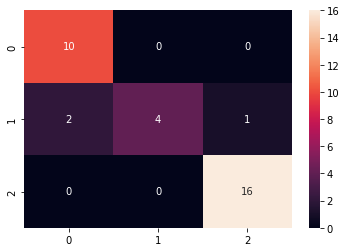

In [25]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [26]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.57      0.73         7
           2       0.94      1.00      0.97        16

    accuracy                           0.91        33
   macro avg       0.92      0.86      0.87        33
weighted avg       0.92      0.91      0.90        33



In [27]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           3.20e-19
Time:                        12:34:52   Log-Likelihood:                -27.904
No. Observations:                 107   AIC:                             133.8
Df Residuals:                      68   BIC:                             238.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1977      1.167      2.740      0.0

# PCA:

In [28]:
from sklearn.decomposition import PCA
# initialize and compute pca
pca = PCA()
X_pca = pca.fit_transform(df)

In [29]:
X_pca

array([[-2.62075114e+01,  7.56684768e+00, -2.58572315e+01, ...,
         2.68822327e-02,  2.69001719e-15, -4.33269206e-15],
       [-5.39230851e+01,  1.55859791e+01,  6.33235226e+00, ...,
         1.80161448e-02,  1.15631160e-14,  9.81076158e-16],
       [-5.88879249e+01, -8.52475839e+00,  2.31899764e+00, ...,
        -6.58193715e-05, -1.06081117e-15,  5.39808586e-15],
       ...,
       [ 2.82349226e+01,  4.84697108e+01, -8.74190575e+00, ...,
         2.81342422e-02,  2.98228523e-15, -1.02117514e-15],
       [ 2.42792814e+01, -7.90644118e+00,  1.36542963e+01, ...,
        -2.10076817e-02,  4.28851380e-15, -2.49741922e-15],
       [ 3.30182510e+01,  2.54790151e+01,  4.00109981e+00, ...,
         1.09371851e-02,  3.05086821e-15, -2.89027754e-15]])

In [30]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 41 components
----------------------------------------
Mean explained variance: 0.024
----------------------------------------
    explained variance  cumulative
1             0.481451    0.481451
2             0.133011    0.614463
3             0.082248    0.696711
4             0.064440    0.761151
5             0.058092    0.819243
6             0.046364    0.865607
7             0.035131    0.900738
8             0.026753    0.927491
9             0.016206    0.943696
10            0.015138    0.958834
11            0.009737    0.968571
12            0.008146    0.976717
13            0.006735    0.983452
14            0.005043    0.988495
15            0.004294    0.992789
16            0.003173    0.995962
17            0.002097    0.998059
18            0.000456    0.998514
19            0.000252    0.998766
20            0.000219    0.998986
----------------------------------------


Limit scree plot to nth component (0 for all) > 0


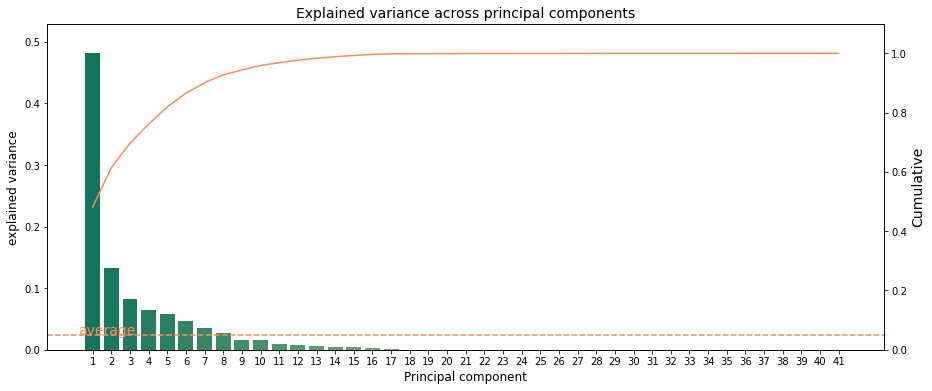

In [31]:
#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)

ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

def do_pca(df, feature_names=None, top_k=10, top_pc=10):
    """Conduct a PCA on standardized data. Show scree plot and heatmap of factor loadings. 
        Returns a PCA object and the PCA tranformation of the data.
     
    Input
        df: dataframe containing standardized data
        feature_names: list of features 
        top_k: Top-k variables to list for factor loadings
        top_pc: Show PC up to top_pc in scree plot and heatmap 
        
    Return 
        tuple: (pca object, pca transformation)
    """
    # store feature names if not given
    if feature_names is None:
        feature_names = list(df.columns)
    
    #---------------
    ### 1.
    # initialize and compute pca
    pca = PCA()
    X_pca = pca.fit_transform(df)
    
    
    #---------------
    ### 2.
    # print explained variance for each component
    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1

    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T

    mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

    print('PCA Overview')
    print('='*40)
    print("Total: {} components".format(n_components))
    print('-'*40)
    print('Mean explained variance:', round(mean_explained_variance,3))
    print('-'*40)
    print(df_explained_variance.head(20))
    print('-'*40)
    
    
    #---------------
    ### 3. 
    # Explained variance plot (scree plot)
    df_explained_variance_limited = df_explained_variance.iloc[:top_pc,:]

    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.set_title('Explained variance across principal components', fontsize=14)
    ax1.set_xlabel('Principal component', fontsize=12)
    ax1.set_ylabel('Explained variance', fontsize=12)

    ax2 = sns.barplot(x=idx[:top_pc], y='explained variance', data=df_explained_variance_limited, palette='YlGnBu')
    ax2 = ax1.twinx()
    ax2.grid(False)

    ax2.set_ylabel('Cumulative', fontsize=14)
    ax2 = sns.lineplot(x=idx[:top_pc]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

    ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
    #label y axis
    ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) 

    max_y1 = max(df_explained_variance_limited.iloc[:,0])
    max_y2 = max(df_explained_variance_limited.iloc[:,1])
    ax1.set(ylim=(0, max_y1+max_y1*.1))
    ax2.set(ylim=(0, max_y2+max_y2*.1))

    plt.show()
    
    
    #---------------
    ### 4. 
    # Correlations of features with components
    df_c = pd.DataFrame(pca.components_, columns=feature_names).T

    print("Factor Loadings of 1st PC")
    print('='*40,'\n')
    print('Top {} highest'.format(top_k))
    print('-'*40)
    print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

    print('Top {} lowest'.format(top_k))
    print('-'*40)
    print(df_c.iloc[:,0].sort_values()[:top_k])
    
    # Plot heatmap
    size_xaxis = round(top_pc * 1.5)
    size_yaxis = round(n_components * 0.5)

    fig, ax = plt.subplots(figsize=(size_xaxis,size_yaxis))
    sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
    plt.show()
    
    #---------------
    ### 5.
    # Pca object and transformed data
    return pca, pd.DataFrame(X_pca)

PCA Overview
Total: 41 components
----------------------------------------
Mean explained variance: 0.024
----------------------------------------
    explained variance  cumulative
1             0.481451    0.481451
2             0.133011    0.614463
3             0.082248    0.696711
4             0.064440    0.761151
5             0.058092    0.819243
6             0.046364    0.865607
7             0.035131    0.900738
8             0.026753    0.927491
9             0.016206    0.943696
10            0.015138    0.958834
11            0.009737    0.968571
12            0.008146    0.976717
13            0.006735    0.983452
14            0.005043    0.988495
15            0.004294    0.992789
16            0.003173    0.995962
17            0.002097    0.998059
18            0.000456    0.998514
19            0.000252    0.998766
20            0.000219    0.998986
----------------------------------------


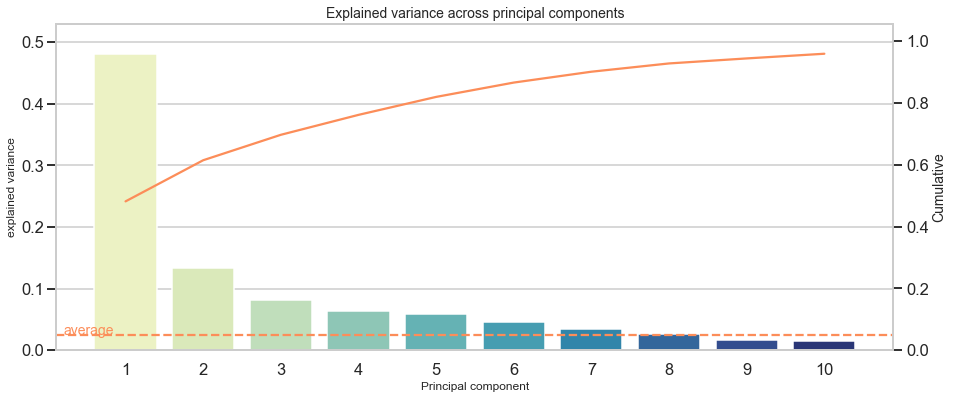

Factor Loadings of 1st PC

Top 10 highest
----------------------------------------
LA_S_Res_2Ch    0.410296
RA_S_Res        0.381366
LA_S_Res_4Ch    0.276865
RV_EF           0.269950
RV_GRS_4Ch      0.267888
RA_S_Con        0.224486
LA_S_Con_2Ch    0.212670
LA_S_Boo_2Ch    0.197627
LV_EF           0.159073
RA_S_Boo        0.156880
Name: 0, dtype: float64 

Top 10 lowest
----------------------------------------
RV_ESVi         -0.304667
RA_ESVi         -0.190276
RV_EDVi         -0.183711
age             -0.182708
RA_EDVi         -0.150609
RV_GLS_4Ch      -0.061722
HR              -0.058032
RV_GCS_SAX      -0.051970
LA_SR_Con_2Ch   -0.023209
LA_SR_Boo_2Ch   -0.023094
Name: 0, dtype: float64


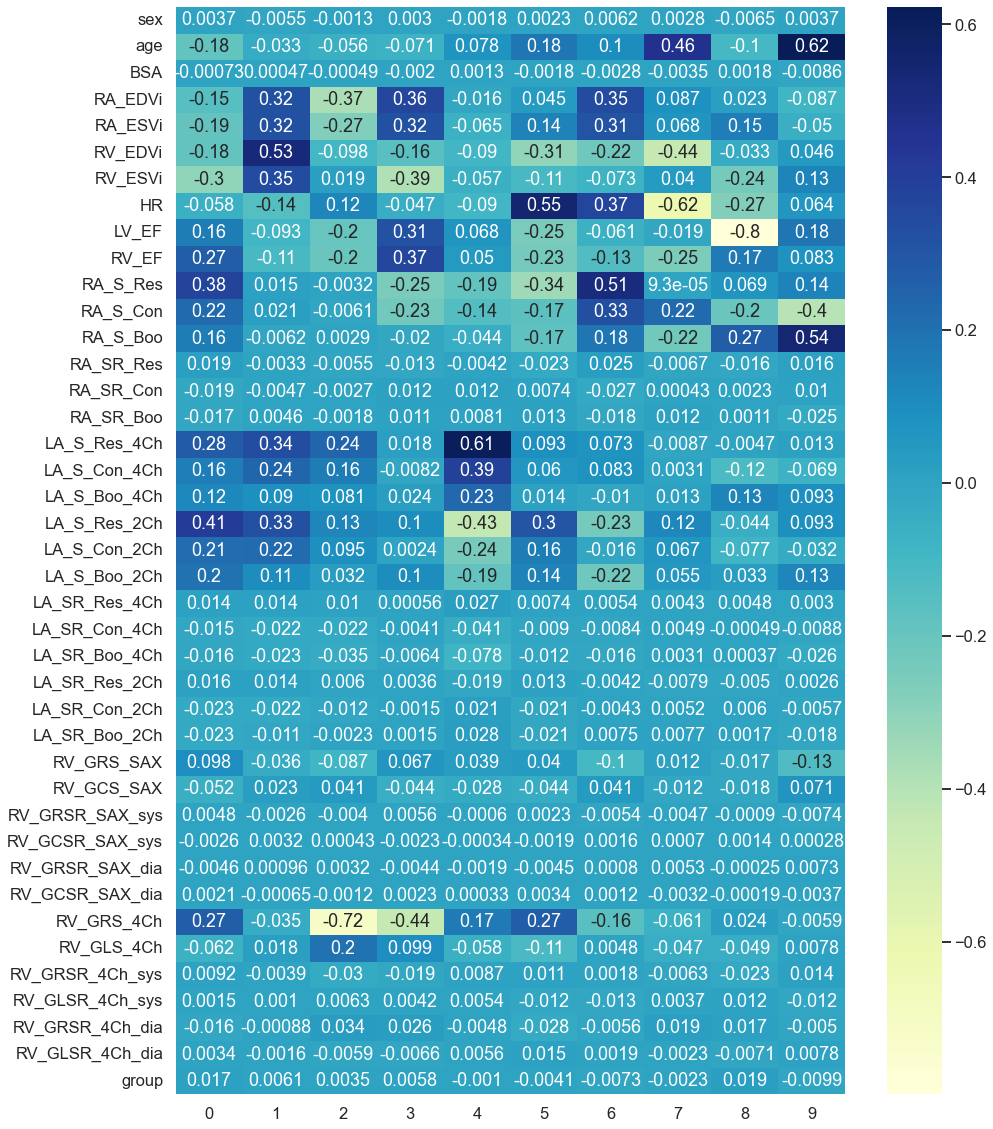

In [33]:
pca, X_pca = do_pca(df, top_pc=10, top_k=10)

# Top 10 parameters:

In [34]:
import pandas as pd
df10 = pd.read_excel("/Users/negin/Desktop/Misagh_paper/toptenAmylonewedited_8Aug22.xlsx")
print(df10)

         LV_EF  RV_EF  RA_S_Res  RA_S_Con  RA_S_Boo  LA_S_Res_4Ch  \
0    62.000000     64      20.2       4.6      15.6        10.000   
1    40.000000     38      16.7       9.2       7.5         9.400   
2    53.000000     35       5.6       3.5       2.1         3.497   
3    72.000000     44       9.0       8.0       1.0        12.500   
4    71.000000     51      11.3       0.9      10.4         7.042   
..         ...    ...       ...       ...       ...           ...   
102  73.387097     68      46.7      30.5      16.2        22.100   
103  68.662519     63      50.4      34.3      16.1        24.000   
104  62.772397     57      36.5      11.8      24.7        52.300   
105  61.931365     56      42.4      21.8      20.6        21.600   
106  63.630090     55      37.9      26.6      11.3        47.900   

     LA_S_Res_2Ch  LA_S_Con_2Ch  LA_S_Boo_2Ch  RV_GRS_4Ch  group  
0          14.000         4.000        10.000       49.00      0  
1           7.300         4.900      

In [35]:
df10.head()

,LV_EF,RV_EF,RA_S_Res,RA_S_Con,RA_S_Boo,LA_S_Res_4Ch,LA_S_Res_2Ch,LA_S_Con_2Ch,LA_S_Boo_2Ch,RV_GRS_4Ch,group
0,62.0,64,20.2,4.6,15.6,10.000,14.000,4.000,10.000,49.00,0
1,40.0,38,16.7,9.2,7.5,9.400,7.300,4.900,2.400,25.80,0
2,53.0,35,5.6,3.5,2.1,3.497,4.051,5.868,-1.817,25.85,0
3,72.0,44,9.0,8.0,1.0,12.500,8.000,5.600,2.400,18.96,0
4,71.0,51,11.3,0.9,10.4,7.042,6.800,6.600,0.200,47.00,0


In [36]:
df10_corr = df10.corr().style.background_gradient(cmap='coolwarm')
df10_corr

,LV_EF,RV_EF,RA_S_Res,RA_S_Con,RA_S_Boo,LA_S_Res_4Ch,LA_S_Res_2Ch,LA_S_Con_2Ch,LA_S_Boo_2Ch,RV_GRS_4Ch,group
LV_EF,1.000000,0.708307,0.438374,0.358103,0.405889,0.270662,0.356144,0.271513,0.401484,0.357414,0.416182
RV_EF,0.708307,1.000000,0.613353,0.461492,0.620230,0.417919,0.553017,0.443046,0.599276,0.476816,0.699380
RA_S_Res,0.438374,0.613353,1.000000,0.899693,0.816336,0.521497,0.684252,0.666367,0.608422,0.506477,0.722375
RA_S_Con,0.358103,0.461492,0.899693,1.000000,0.482326,0.454670,0.628054,0.634587,0.532613,0.481962,0.612704
RA_S_Boo,0.405889,0.620230,0.816336,0.482326,1.000000,0.444925,0.542123,0.497588,0.516233,0.378672,0.638937
LA_S_Res_4Ch,0.270662,0.417919,0.521497,0.454670,0.444925,1.000000,0.600568,0.591070,0.527032,0.303999,0.662115
LA_S_Res_2Ch,0.356144,0.553017,0.684252,0.628054,0.542123,0.600568,1.000000,0.941669,0.925427,0.395658,0.798076
LA_S_Con_2Ch,0.271513,0.443046,0.666367,0.634587,0.497588,0.591070,0.941669,1.000000,0.743922,0.345541,0.734890
LA_S_Boo_2Ch,0.401484,0.599276,0.608422,0.532613,0.516233,0.527032,0.925427,0.743922,1.000000,0.396595,0.757289
RV_GRS_4Ch,0.357414,0.476816,0.506477,0.481962,0.378672,0.303999,0.395658,0.345541,0.396595,1.000000,0.426987


In [51]:
# Specify the name of the excel file
file_name1 = 'correlation matrix table PCA.xlsx'
  
# saving the excelsheet
df10_corr.to_excel(file_name1)
print('Table successfully exported into Excel File')

Table successfully exported into Excel File


In [37]:
#Export png of the correlation table:

import dataframe_image as dfi
dfi.export(df10_corr,"toptenamylonew.png",max_rows=-1, max_cols = -1)

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'
[0815/123459.083319:INFO:headless_shell.cc(660)] Written to file /var/folders/t4/g8gws8z50jg1j9vtfvtjy3b80000gn/T/tmp9sgsz5q6/temp.png.


# SVM top 10 parameters:

In [38]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X10 = df10.iloc[:, :10].values    # pandas DataFrame to Numpy array
y10 = df10.iloc[:, 10].values

In [39]:
# Split dataset into training set and test set
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.3, random_state=1)

In [40]:
X10

array([[62.        , 64.        , 20.2       , ...,  4.        ,
        10.        , 49.        ],
       [40.        , 38.        , 16.7       , ...,  4.9       ,
         2.4       , 25.8       ],
       [53.        , 35.        ,  5.6       , ...,  5.868     ,
        -1.817     , 25.85      ],
       ...,
       [62.77239709, 57.        , 36.5       , ..., 26.3       ,
        23.5       , 58.76      ],
       [61.93136472, 56.        , 42.4       , ..., 21.2       ,
        19.7       , 31.33      ],
       [63.63008972, 55.        , 37.9       , ..., 23.3       ,
        19.6       , 44.44      ]])

In [41]:
y10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
print(f'Train: {X_train10.shape, y_train10.shape}  \nTest: {X_test10.shape, y_test10.shape}')

Train: ((74, 10), (74,))  
Test: ((33, 10), (33,))


In [43]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler10 = StandardScaler()
scaler.fit(X_train10)

X_train10 = scaler.transform(X_train10)
X_test10 = scaler.transform(X_test10)

In [44]:
X_train10

array([[-3.39403590e-03,  4.13214773e-01,  3.77455091e-01,
        -4.37030654e-01,  1.45301680e+00,  1.65549183e+00,
         1.09716039e+00,  1.03942841e+00,  9.96230554e-01,
         8.52110110e-01],
       [-3.09660113e+00, -2.02327074e+00, -1.34445277e+00,
        -7.87353809e-01, -1.65718785e+00, -9.32512938e-01,
        -1.11983579e+00, -9.62804243e-01, -1.12193173e+00,
        -1.29954161e+00],
       [-1.86719796e+00, -7.44115845e-01, -1.21729650e+00,
        -1.01841802e+00, -1.04185959e+00, -5.90211707e-01,
        -9.08916496e-01, -8.61851337e-01, -8.24487666e-01,
        -9.83122242e-01],
       [ 8.53835467e-02, -1.31701920e-02, -1.39743455e+00,
        -1.21966749e+00, -1.12017410e+00, -6.05770854e-01,
        -8.66732636e-01, -8.36613110e-01, -7.70406926e-01,
        -4.56715470e-01],
       [ 8.80879716e-01,  1.14416043e+00, -8.67616748e-01,
        -1.16749170e+00, -7.97099551e-02, -9.79190379e-01,
        -1.23232609e+00, -1.19836103e+00, -1.08587791e+00,
        -8.

In [45]:
X_test10

array([[ 2.88968717e-01,  3.52302635e-01,  2.50298818e-01,
         3.75420918e-01, -3.49588091e-02,  1.16278551e+00,
         3.44070814e+00,  3.14261397e+00,  3.24959469e+00,
        -1.66664380e-01],
       [-2.03887788e-01, -1.29232509e+00,  1.54931613e-01,
        -7.18001307e-02,  4.34928224e-01, -7.35430411e-01,
        -6.74561720e-01, -9.54391501e-01, -2.74666817e-01,
         4.52407139e-02],
       [ 3.77770910e-01,  2.30478359e-01,  3.72156913e-01,
         5.46855654e-01, -3.49588091e-02, -3.82756415e-01,
         1.83176760e-01, -1.63593731e-01,  5.27530814e-01,
        -1.02147610e+00],
       [ 8.80879716e-01,  1.32689684e+00,  1.43709070e+00,
         2.85976709e-01,  2.60535881e+00, -7.67598597e-02,
        -4.82390804e-01, -4.15975998e-01, -4.81976317e-01,
        -6.18281118e-01],
       [-2.66269413e+00, -7.44115845e-01, -9.52387596e-01,
        -7.94807493e-01, -8.18103865e-01, -8.23598910e-01,
        -7.68303630e-01, -1.55180989e-01, -1.31121432e+00,
        -3.

In [46]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train10,y_train10)

# testing the model
y_pred10 = classifier1.predict(X_test10)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test10, y_pred10))

0.8181818181818182


In [47]:
y_pred

array([2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0])

In [48]:
# # importing SVM module
# from sklearn.svm import SVC

# # kernel to be set radial bf 
# classifier1 = SVC(kernel='linear')

# # traininf the model
# classifier1.fit(X_train10,y_train10)

# # testing the model
# y_pred10 = classifier1.predict(X_test10)

# # importing accuracy score
# from sklearn.metrics import accuracy_score

# # printing the accuracy of the model
# print(accuracy_score(y_test10, y_pred10))

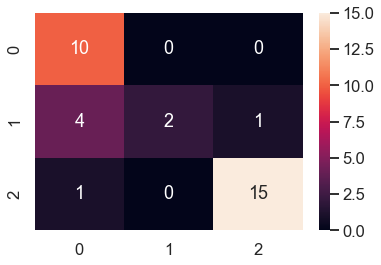

In [49]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm10 = confusion_matrix(y_test10, y_pred10)

# true Write data values in each cell of the matrix
sns.heatmap(cm10,annot=True)
plt.savefig('confusion.png')

In [50]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test10, y_pred10))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.29      0.44         7
           2       0.94      0.94      0.94        16

    accuracy                           0.82        33
   macro avg       0.87      0.74      0.73        33
weighted avg       0.87      0.82      0.79        33

